In [1]:
!pip install feature-engine
!pip install arcticdata=='1.4'

     |████████████████████████████████| 205 kB 887 kB/s            


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import arcticdata.ExploratoryDataAnalysis as eda

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/amazon-alexa-reviews/amazon_alexa.tsv


In [3]:
df = pd.read_csv('/kaggle/input/amazon-alexa-reviews/amazon_alexa.tsv',sep='\t')
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [5]:
df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [6]:
eda.missing_data(df)

,Total,Percent
rating,0,0.0
date,0,0.0
variation,0,0.0
verified_reviews,0,0.0
feedback,0,0.0


The feature rating is NUMERIC

-Missing values in training set: 0
-Outliers 1.5*IQR: 257
-Outliers   3*IQR: 0


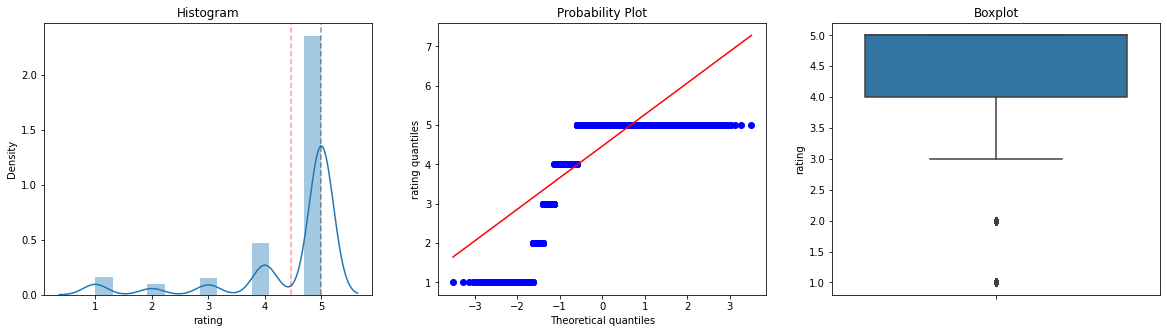

In [7]:
eda.feature_analysis(df,'rating')

The feature feedback is NUMERIC

-Missing values in training set: 0
-Outliers 1.5*IQR: 257
-Outliers   3*IQR: 257


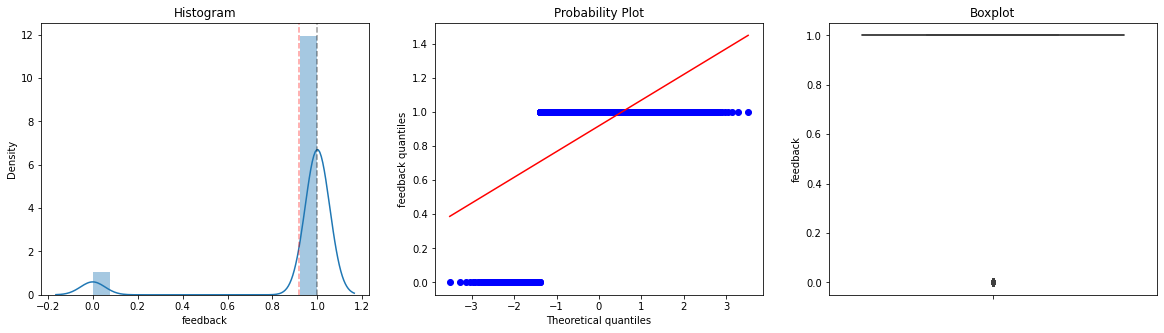

In [8]:
eda.feature_analysis(df,'feedback')

In [9]:
df['length'] = df.verified_reviews.apply(len)
df.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


The feature length is NUMERIC

-Missing values in training set: 0
-Outliers 1.5*IQR: 238
-Outliers   3*IQR: 102


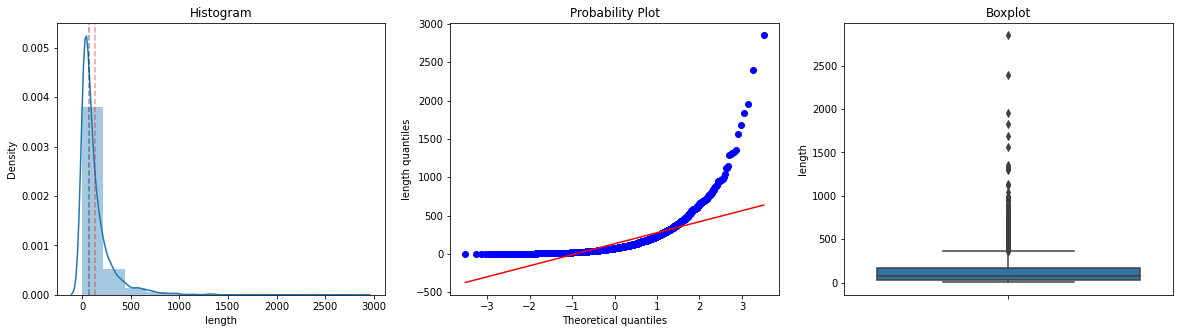

In [10]:
eda.feature_analysis(df,'length')

In [11]:
df[df.length==1].verified_reviews

60      😍
85       
183      
219      
374      
       ..
3114     
3120     
3123     
3126     
3141     
Name: verified_reviews, Length: 81, dtype: object

In [12]:
positive = df[df.feedback==1]
negative = df[df.feedback==0]

In [13]:
sentences = df.verified_reviews.tolist()
sentences_as_one_string = " ".join(sentences)

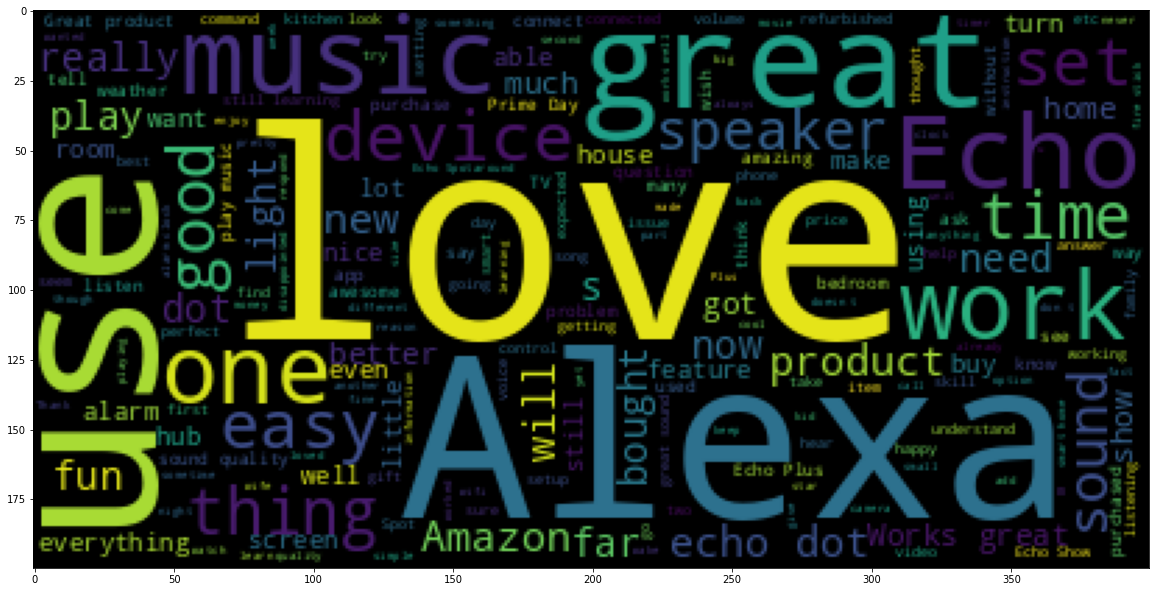

In [14]:
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))
plt.show()

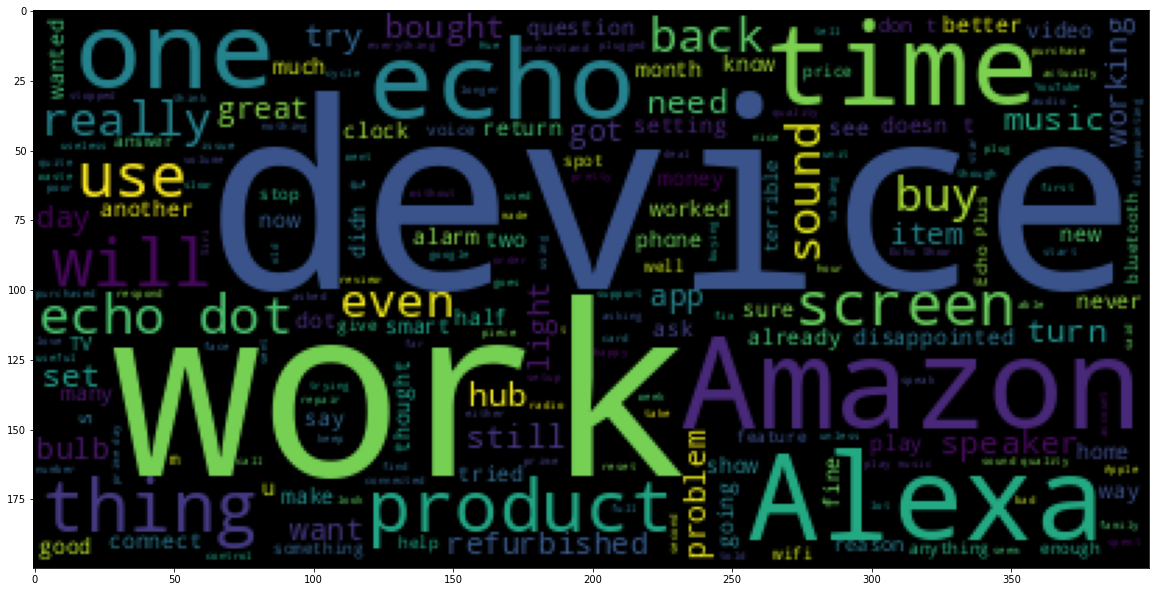

In [15]:
sentencesneg = negative.verified_reviews.tolist()
sentences_as_one_string_neg = " ".join(sentencesneg)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string_neg))
plt.show()

In [16]:
df = df.drop(['date', 'rating', 'length'], axis = 1)
df.head()

,variation,verified_reviews,feedback
0,Charcoal Fabric,Love my Echo!,1
1,Charcoal Fabric,Loved it!,1
2,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,Charcoal Fabric,Music,1


In [17]:
variation_dummies = pd.get_dummies(df['variation'], drop_first=True)
variation_dummies

,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [18]:
df.drop(['variation'], axis = 1, inplace = True)
df = pd.concat([df, variation_dummies],axis = 1)
df.head()

,verified_reviews,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,Love my Echo!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Loved it!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,"Sometimes while playing a game, you can answer...",1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,I have had a lot of fun with this thing. My 4 ...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Music,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [19]:
# Removing punctuation marks and stopwords
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [20]:
import nltk 
from nltk.corpus import stopwords
nltk.download('stopwords')

def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer=message_cleaning)
reviews_vectorized = vectorizer.fit_transform(df['verified_reviews'])

reviews = pd.DataFrame(reviews_vectorized.toarray())

df.drop(['verified_reviews'], axis = 1, inplace = True)
df = pd.concat([df, reviews], axis = 1)
df.head()

,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,...,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
X = df.drop(['feedback'], axis = 1)
y = df['feedback']

X.shape,y.shape

((3150, 5226), (3150,))

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2520, 5226), (2520,), (630, 5226), (630,))

In [24]:
def confusion_plot(pred,y_t):
    print(classification_report(y_t,pred))
    matrix = confusion_matrix(y_t, pred)
    sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
    plt.xlabel("predicted")
    plt.ylabel("actual")
    plt.show()

              precision    recall  f1-score   support

           0       0.93      0.62      0.75       217
           1       0.97      1.00      0.98      2303

    accuracy                           0.96      2520
   macro avg       0.95      0.81      0.86      2520
weighted avg       0.96      0.96      0.96      2520



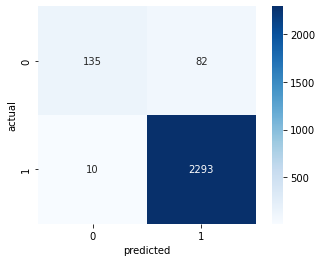

In [25]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

model = MultinomialNB()
model.fit(X_train, y_train)
preds = model.predict(X_train)

confusion_plot(preds,y_train)

              precision    recall  f1-score   support

           0       0.54      0.33      0.41        40
           1       0.96      0.98      0.97       590

    accuracy                           0.94       630
   macro avg       0.75      0.65      0.69       630
weighted avg       0.93      0.94      0.93       630



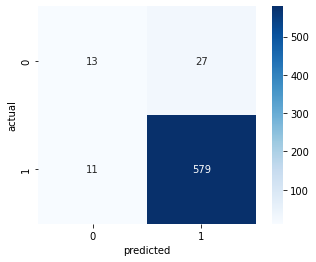

In [26]:
preds = model.predict(X_test)

confusion_plot(preds,y_test)

              precision    recall  f1-score   support

           0       0.81      0.33      0.46        40
           1       0.96      0.99      0.98       590

    accuracy                           0.95       630
   macro avg       0.88      0.66      0.72       630
weighted avg       0.95      0.95      0.94       630



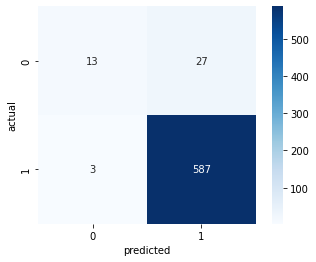

In [27]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)
confusion_plot(preds,y_test)